In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

c:\program files\python36\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/exam.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hours   20 non-null     float64
 1   pass    20 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 448.0 bytes


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [6]:
# chuẩn bị dữ liệu
X = df.drop('pass', axis = 1)
y = df['pass']

In [8]:
X.head()

,hours
0,0.50
1,0.75
2,1.00
3,1.25
4,1.50


In [9]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: pass, dtype: int64

In [12]:
# chia dữ liệu thành 2 bộ train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [13]:
# khởi tạo model
model = LogisticRegression()

In [14]:
# huấn luyện model
model.fit(X_train, y_train)

LogisticRegression()

In [15]:
# kiểm tra (xác minh) model với dữ liệu train
yhat_train = model.predict(X_train)

In [16]:
y_train[:5]

9     0
7     0
18    1
19    1
11    0
Name: pass, dtype: int64

In [17]:
yhat_train[:5]

array([0, 0, 1, 1, 1], dtype=int64)

In [18]:
# kiểm tra trên bộ test
yhat_test = model.predict(X_test)

In [19]:
y_test[:5]

4     0
2     0
6     1
16    1
Name: pass, dtype: int64

In [20]:
yhat_test[:5]

array([0, 0, 0, 1], dtype=int64)

In [21]:
# đo R2
print('Model score on train:', model.score(X_train, y_train))
print('Model score on test:', model.score(X_test, y_test))

Model score on train: 0.75
Model score on test: 0.75


In [24]:
#đo accuracy score
from sklearn.metrics import accuracy_score, mean_squared_error

In [23]:
print('Accuracy score on train:', accuracy_score(y_train, yhat_train))
print('Accuracy score on test:', accuracy_score(y_test, yhat_test))

Accuracy score on train: 0.75
Accuracy score on test: 0.75


In [25]:
print('MSE on train:', mean_squared_error(y_train, yhat_train))
print('MSE on test:', mean_squared_error(y_test, yhat_test))

MSE on train: 0.25
MSE on test: 0.25


In [27]:
model.coef_ # tương ứng với intercept_

array([[1.18652893]])

In [34]:
from scipy.stats import linregress
import math

In [32]:
info = linregress(X['hours'], y)

In [33]:
info

LinregressResult(slope=0.23459561219317931, intercept=-0.1539352689884873, rvalue=0.689243146277994, pvalue=0.0007751131598569146, stderr=0.058125622469009215)

In [36]:
# với thời gian học 4 giờ -> xác suất vượt qua kỳ thi ?
p = 1/(1 + math.exp(-(info.intercept + info.slope * 4)))
p

0.6866377906186065

In [37]:
yhat_test_proba = model.predict_proba(X_test)

In [38]:
yhat_test_proba[:5]

array([[0.84395159, 0.15604841],
       [0.90730745, 0.09269255],
       [0.80079916, 0.19920084],
       [0.13335   , 0.86665   ]])

In [39]:
yhat_test

array([0, 0, 0, 1], dtype=int64)

In [40]:
X_test[:5]

,hours
4,1.50
2,1.00
6,1.75
16,4.50


In [43]:
X_new = np.linspace(0, 6, 1000).reshape(-1,1)
yhat_new = model.predict_proba(X_new)

In [45]:
yhat_new[:5]

array([[0.96975528, 0.03024472],
       [0.96954557, 0.03045443],
       [0.96933444, 0.03066556],
       [0.9691219 , 0.0308781 ],
       [0.96890794, 0.03109206]])

In [46]:
y_pass = yhat_new[:, 1]
y_fail = yhat_new[:, 0]

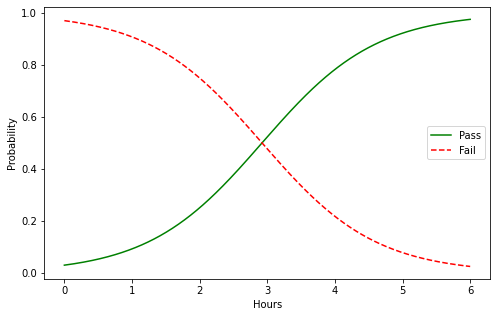

In [49]:
plt.figure(figsize=(8,5))
plt.plot(X_new, y_pass, 'g-', label='Pass')
plt.plot(X_new, y_fail, 'r--', label='Fail')
plt.xlabel('Hours')
plt.ylabel('Probability')
plt.legend()
plt.show()